
**Sobre o Conjunto de Dados**: "`Breast Cancer Wisconsin` é um dataset conhecido para problemas de classificação e contém informações sobre tumores mamários, com o objetivo de classificar os tumores como benignos (não cancerígenos) ou malignos (cancerígenos) com base em características extraídas das imagens de biópsias. Esse dataset foi coletado por meio de exames de diagnóstico, utilizando a técnica de imagem chamada mamografia".

**Créditos e Mais informações**:


*  [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
*   [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)





---



# Importando o conjunto de dados e bibliotecas 🎲



In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
dados = pd.read_csv('data.csv', sep=',')



---



# Tratamento dos Dados 🧹

O objetivo é encontrar e eliminar possíveis erros ou valores nulos que possam dificultar a análise dos dados e, posteriormente, o treinamento de um modelo de Machine Learning.


Antes de exibir o conjunto de dados em formato tabular, a execução do método `info()` retorna o nome de todas as colunas, a contagem de valores não-nulos e o tipo de dado de cada uma delas. Todos esses valores são importantes de observar, e para esse dataset, não será necessário tratar valores nulos.

In [331]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- As colunas `id` e `Unnamed`... não são necessárias e serão removidas. Essas duas colunas, não representam atributos das imagens de células do tecido mamário.



---




 Exibindo o conjunto de dados em formato de tabela, mostrando apenas 5 linhas que representam bem os dados:

In [332]:
dados = dados.loc[:, 'diagnosis':'fractal_dimension_worst'] # Localizar todas as linhas e colunas necessárias
dados.iloc[17:22, :] # Localizar algumas linhas para exibição

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
17,M,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
18,M,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773




*   O valor alvo é a primeira coluna - é o diagnóstico para as características da imagem de células do tecido mamário.




In [333]:
dados.shape

(569, 31)

- Dimensões do conjunto de dados | tabela: `569 amostras` (linhas) e `31 atributos `(colunas).



---



## Codificação de Variáveis

Substituir os valores da `variável alvo` ou `preditora` para números é fundamental para uma análise estatística, treinamento e avaliação de modelos de ML. Embora a substituição seja feita manualmente, existem diferentes algoritmos e com diferentes propósitos de substituição de valores.

In [334]:
import warnings
warnings.filterwarnings("ignore") # Removendo aleartas desnecessários

dados['diagnosis'].replace('M', 1, inplace=True) # Substituição M -> 1
dados['diagnosis'].replace('B', 0, inplace=True) # Substituição B -> 0

- Os valores **M** foram substituídos por **1**.
- Os valores **B** foram substituídos por **0**.

In [335]:
dados.iloc[17:21, 0] # Exibir 5 linhas da variável alvo (diagnosis)

,diagnosis
17,1
18,1
19,0
20,0


In [336]:
dados.diagnosis.dtype # Exibir o tipo de dado da coluna diagnosis

dtype('int64')

- Com a substituição dos valores, toda a coluna teve o tipo de dado alterado para numérico `int64`, o que garante um padrão consistente na estratura dos dados.

Um fator que precisa ser considerado é a escala dos dados e os algoritmos de ML que serão utilizados posteriormente, pois existem modelos que são sensíveis a escala dos dados preditores, mas não pretendo utiliza-los. `StandardScaler` do SKlearn pode ser interessante em casos em que é preciso padronizar a escala dos dados numéricos.



---



# Análise Exploratória 📊
Identificar padrões, tendências, anomalias e relações entre variáveis.

In [337]:
dados.diagnosis.value_counts() # Contagem dos valores da variável alvo

,count
diagnosis,
0,357
1,212


O percentual dos valores da classe alvo podem ser representados em um gráfico de setores.

Text(0.5, 1.0, 'Distribuição dos Valores Alvo        [0 = Benigno, 1 = Maligno]')

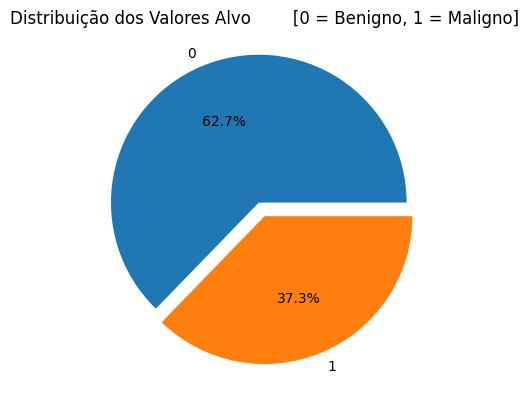

In [338]:
# Gráfico de setores

contagem = dados['diagnosis'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', explode=(0.1, 0))
plt.title("Distribuição dos Valores Alvo        [0 = Benigno, 1 = Maligno]")



---



Abaixo, está uma série de histogramas que apresentam a distribuição de todos os valores e frequência para cada uma das variáveis. As cores dividem a distribuição de acordo com o valor alvo e revela alguns aspectos interessantes sobre os dados:

- A relevância dos valores `0` (B) em toda a distribuição, isso acontece por causa da quantidade que é quase o dobro de `1` (M).

- Algumas distribuições são assimétricas e possuem uma cauda longa e arrastada, indicando a presença de outliers, já outras se aproximam de uma distribuição normal. No geral, o comportamento dos dados é misto e, em alguns casos, não segue uma tendência - o tipo de comportamento que pode prejudicar a precisão de um modelo de ML.

- As distribuições apresentam sobreposição dos dados, e algumas quase que inteiramente sobrepostas são indicativos de uma variável preditora não muito eficiente em distinguir os valores alvo.

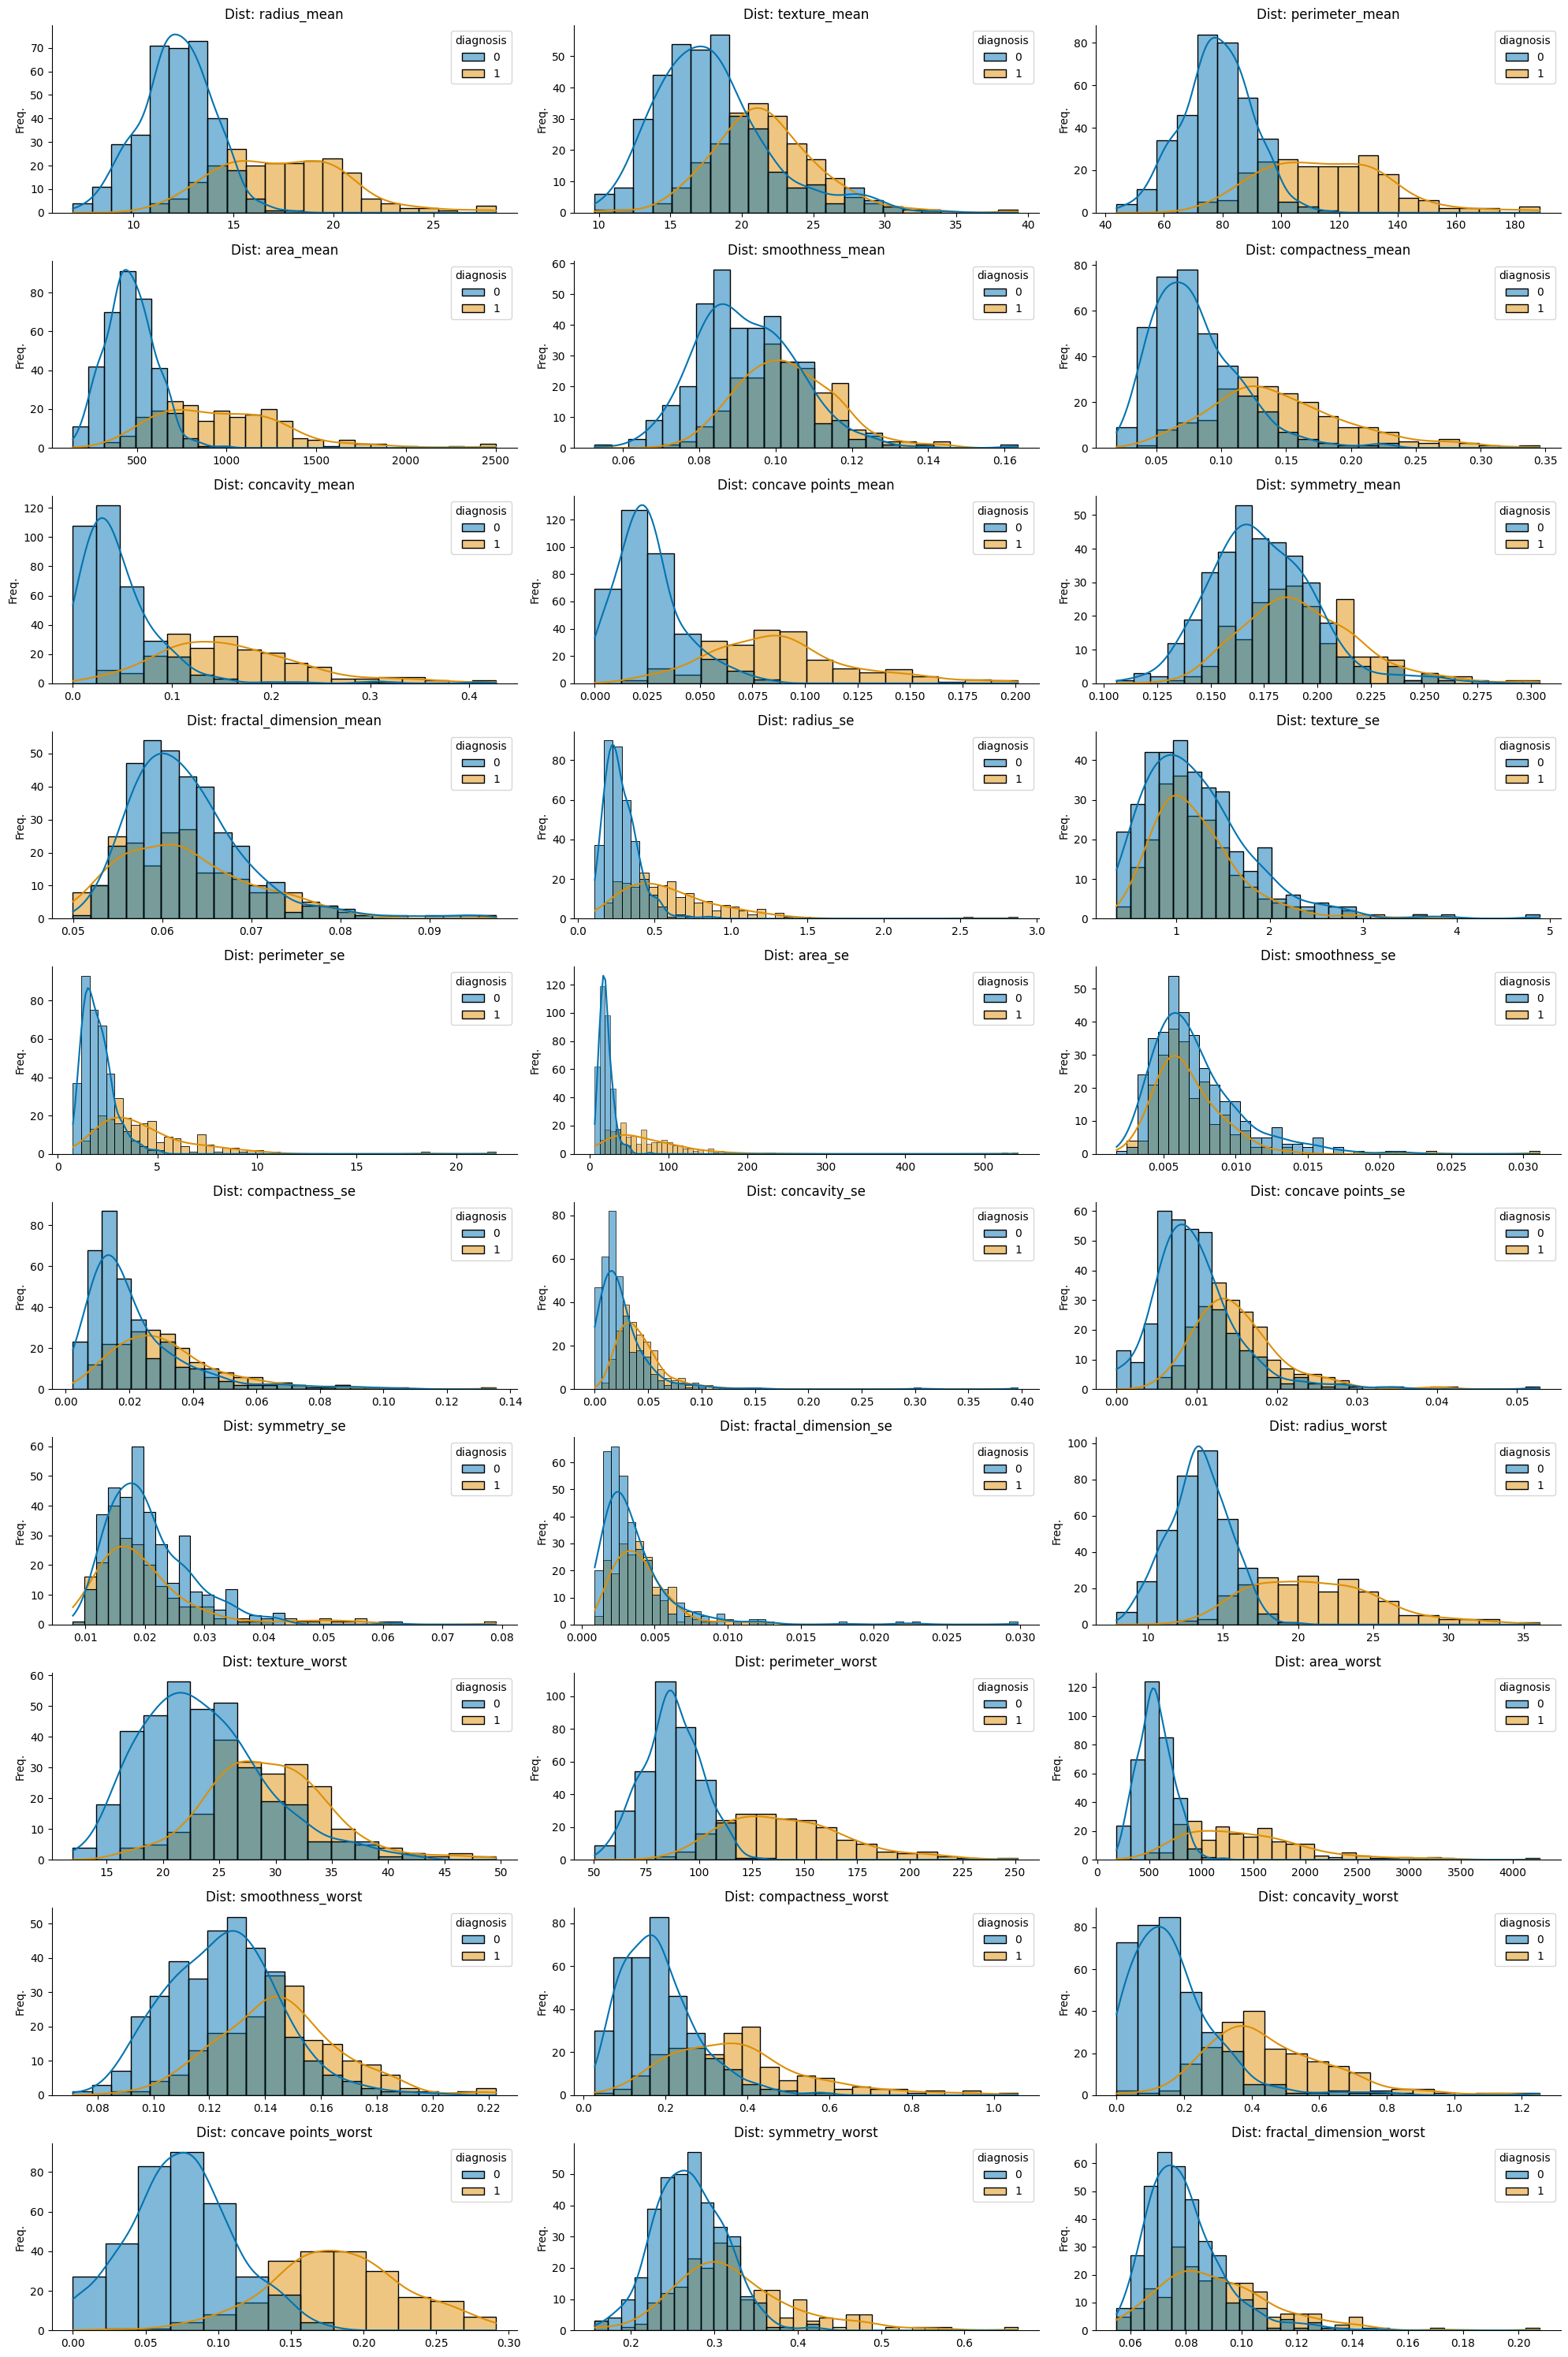

In [339]:
# Gerar histograma para cada uma das variáveis preditoras

variaveis = dados.columns[1:]
fig, axes = plt.subplots(10, 3, figsize=(20, 30))
axes = axes.flatten()
for i, var in enumerate(variaveis):
    sns.histplot(dados, x=var, kde=True, ax=axes[i], hue='diagnosis', palette='colorblind')
    axes[i].set_title(f'Dist: {var}')
    axes[i].set_ylabel("Freq.")
    axes[i].set_xlabel("")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.tight_layout()
plt.show()



---



Existe a possibilidade, se for preciso, de gerar gráficos de dispersão para entender a correlação entre as variáveis. Exibindo apenas dois exemplos de gráficos que relacionam duas variáveis em cada um deles, está claro que o primeiro gráfico apresenta uma forte correlação positiva, enquanto o segundo gráfico mostra uma baixa correlação negativa. O primeiro é marcado pela forma linear e o segundo pela dispersão dos pontos.

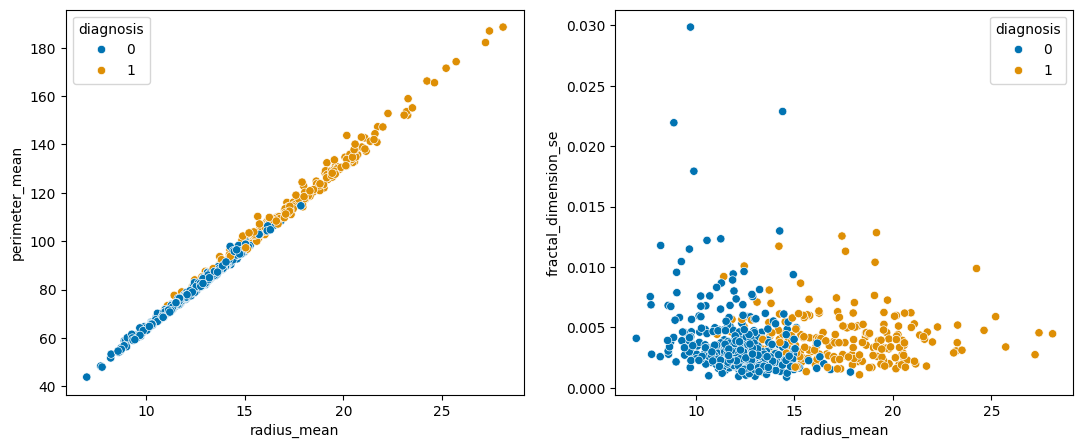

In [340]:
# Gráficos de dispersão

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.scatterplot(x=dados['radius_mean'], y=dados['perimeter_mean'], hue=dados['diagnosis'], palette='colorblind', ax=axes[0])
sns.scatterplot(x=dados['radius_mean'], y=dados['fractal_dimension_se'], hue=dados['diagnosis'], palette='colorblind', ax=axes[1])
plt.show()

In [341]:
correlacao1 = dados['radius_mean'].corr(dados['perimeter_mean'])
correlacao2 = dados['radius_mean'].corr(dados['fractal_dimension_se'])
print(correlacao1, correlacao2)

0.9978552814938105 -0.04264126911445617


- Correlação de **radius_mean** e **perimeter_mean**: `0,99`.

- Correlação de **radius_mean** e **fractal_dimension_se**: `-0,04`.




---



O uso de boxplot para analisar as distribuições do conjunto de dados é tão útil quanto o histograma, principalmente na visualização dos outliers. A remoção ou alteração dos outliers depende de muitos fatores, e se tratando de dados de contexto clínico, outliers podem representar dados sensíveis, e precisariam de uma análise profunda dos valores para não prejudicar o treinamento de um modelo ML alterando ou excluindo esses dados importantes.

Três exemplos de boxplot de duas variáveis nos gráficos abaixo.

- Um deles é dividido pela variável alvo.

- Os outliers são representados por pontos no extremo das caixas.

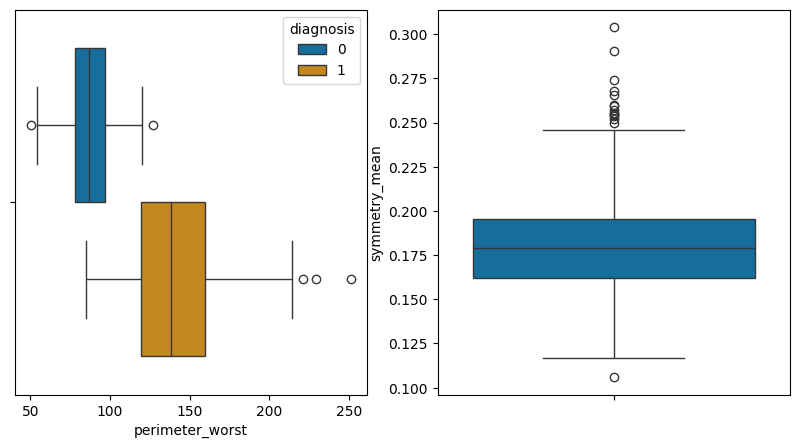

In [342]:
# Gráficos boxplot

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(dados, x=dados['perimeter_worst'], palette='colorblind', hue='diagnosis', ax=axes[0])
sns.boxplot(dados['symmetry_mean'], palette='colorblind', ax=axes[1])
plt.show()

O método `describe()` descreve a estatística de cada uma das variáveis. Outros métodos como `mode()` e `median()` podem ser utilizados para avaliar a tendência central.

In [343]:
dados.describe() # Estatísticas descritivas das variáveis

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [344]:
dados.loc[dados['concavity_mean'] == 0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,0,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,0,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,0,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,0,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,0,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,0,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,0,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592




---



Voltando a falar sobre a correlação entre as variáveis: O uso do método `corr()` é útil para calcular a correlação entre todas as variáveis e suas combinações. A seguir, uma tabela com os valores da correlação da variável alvo (diagnosis) com cada uma das variáveis preditoras:

In [345]:
dados.corr()['diagnosis'].sort_values(ascending=True) # Correlação da variável alvo e suas combinações em ordem

,diagnosis
smoothness_se,-0.067016
fractal_dimension_mean,-0.012838
texture_se,-0.008303
symmetry_se,-0.006522
fractal_dimension_se,0.077972
concavity_se,0.253730
compactness_se,0.292999
fractal_dimension_worst,0.323872
symmetry_mean,0.330499
smoothness_mean,0.358560


Dependendo do caso, identificar as melhores variáveis preditoras que possuem relação linear com a variável alvo pode ser importante.

In [346]:
dados.corr() # Correlação de todas as variáveis e suas combinações

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


O gráfico abaixo representa a mesma tabela de correlações que está acima, mas com a variação das cores que indicam o grau da correlação - muito mais intuitivo na identificação das variáveis!

<Axes: >

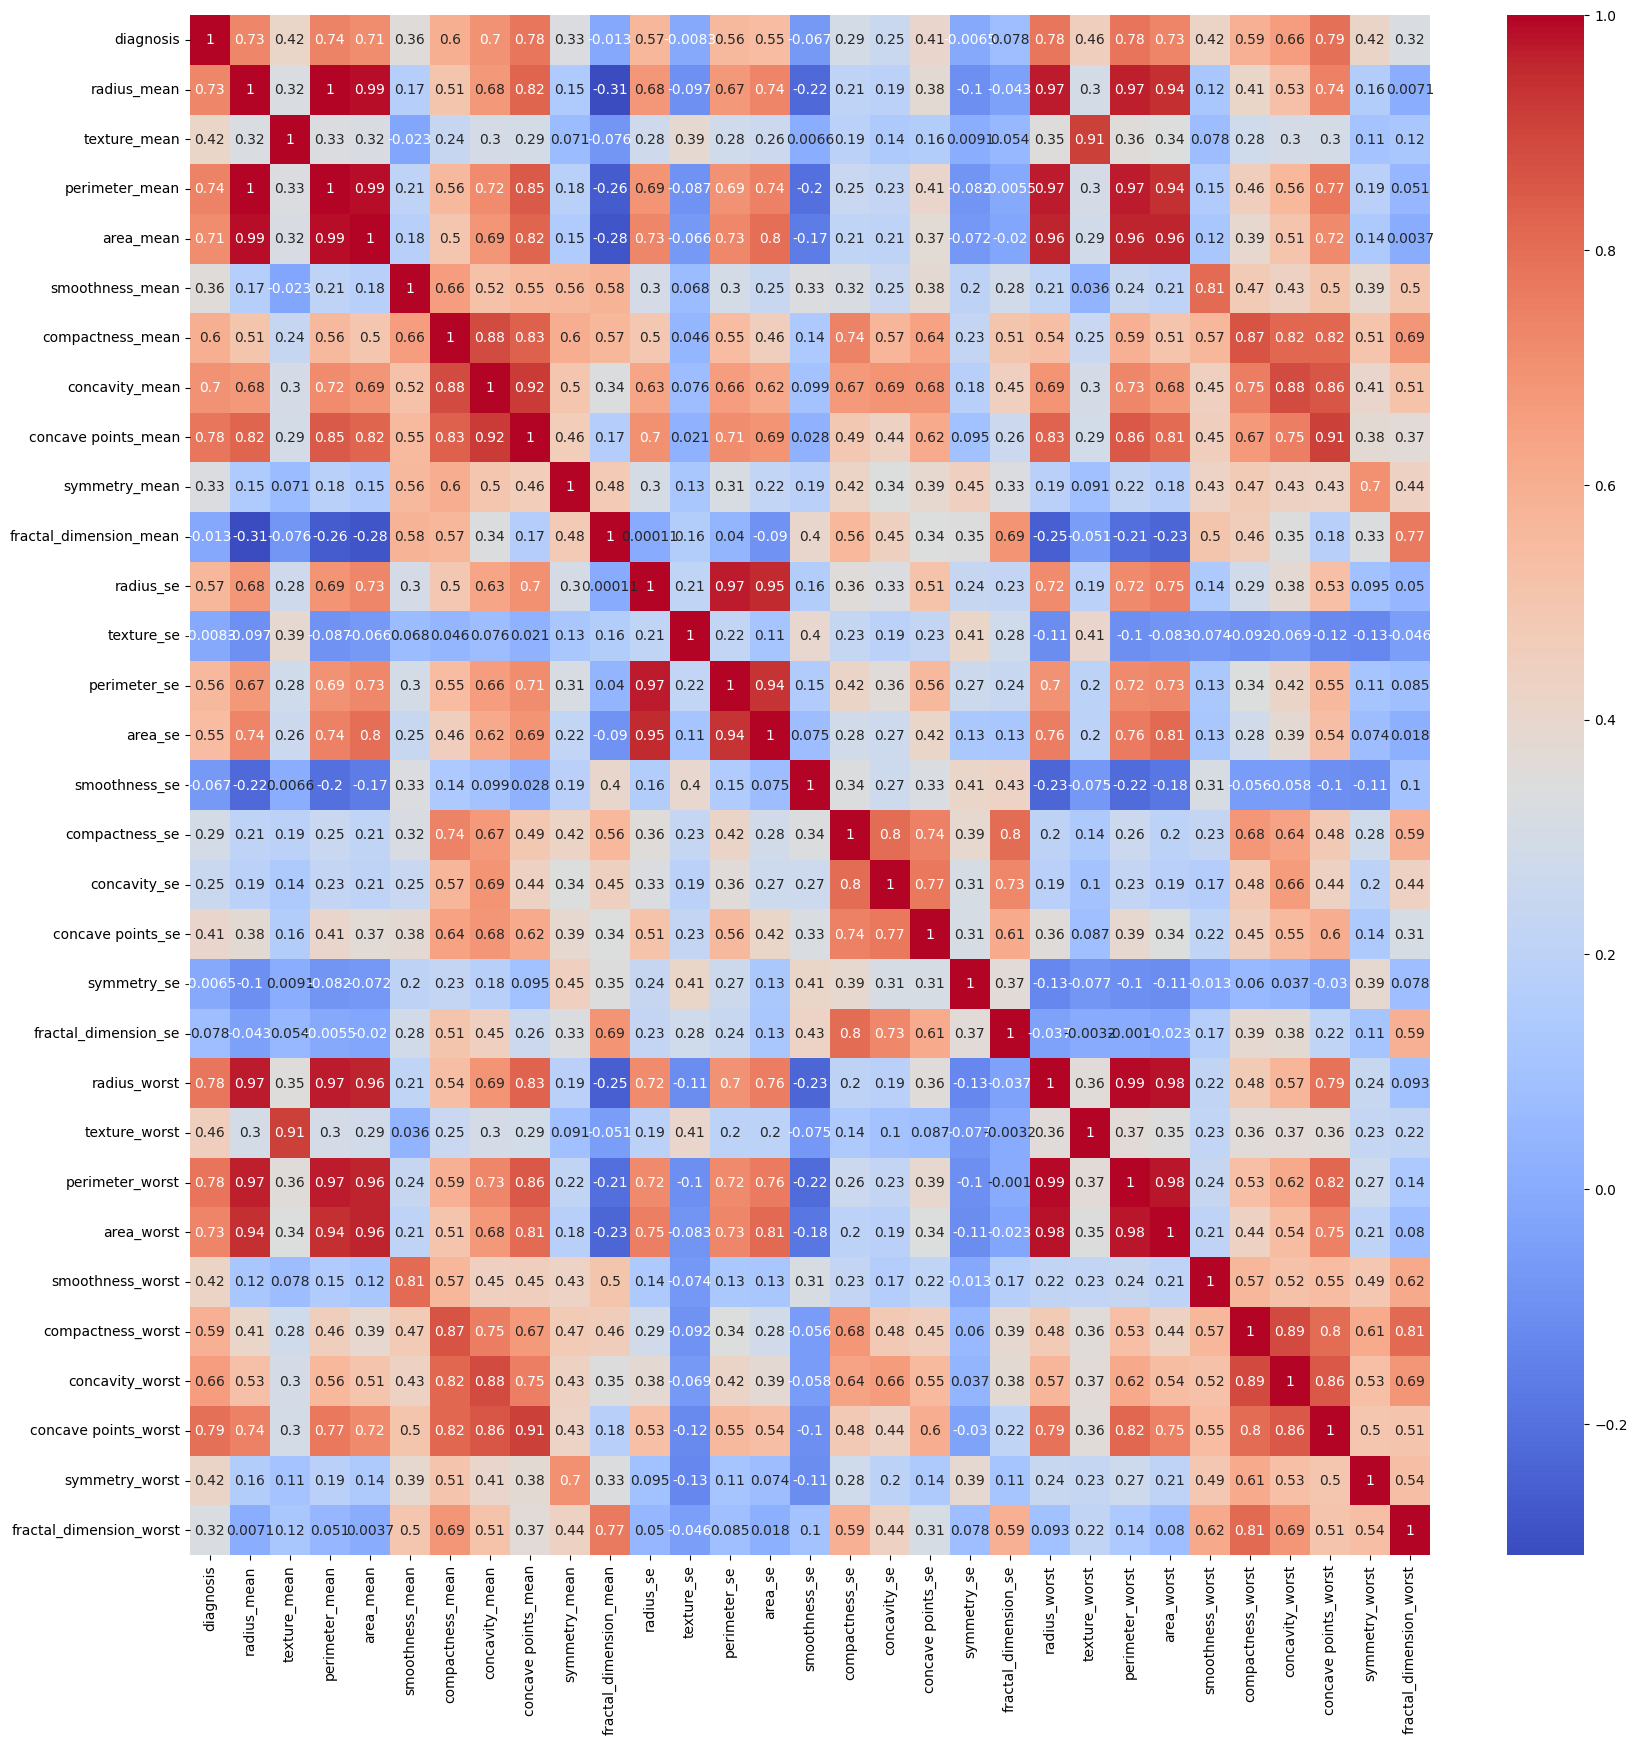

In [347]:
# Heatmap

plt.figure(figsize=(20,20))
sns.heatmap(dados.corr(), cmap='coolwarm', annot=True)



---



# Treinamento do Modelo 🥊

As etapas da construção do modelo de classificação com **Scikit-Learn**, ajustes e avaliação de desempenho.

## Separação das Classes: Preditores e Alvo

Antes de criar o modelo, é preciso localizar os dados de entrada (variáveis preditoras) e saída (variável alvo) para armazená-los em locais diferentes. Os algoritmos que serão utilizados trabalham com os dados preditores e alvo separados. É comum que os preditores sejam atribuídos para uma variável `X`, e os valores alvo em `Y`.



*   **var_preditoras**: matriz com todas as variáveis preditoras.
*   **var_alvo**: apenas os valores da variável alvo.



In [348]:
var_preditoras = dados.loc[:, 'radius_mean':'fractal_dimension_worst'].values
var_alvo = dados['diagnosis'].values

In [349]:
print(var_preditoras) # Exibir a variável com os dados preditores.

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [350]:
print(var_alvo) # Exibir a variável com os valores alvo.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [351]:
print('Preditoras:', len(var_preditoras), 'Alvo:', len(var_alvo)) # Exibir a quantidade de linhas das duas variáveis

Preditoras: 569 Alvo: 569




---



## Separação Treino e Teste

Dividir o conjunto de dados em duas partes: uma parte será usada para **treinar o modelo** e, a outra, para **testar o modelo**. Separar os dados é essencial para conseguir avaliar o desempenho do modelo com dados diferentes daqueles que serão utilizados para treinar o modelo.

In [352]:
from sklearn.model_selection import train_test_split # Importando o algoritmo train_test_split



*   `train_test_split()` fará a separação dos dados de acordo com o parâmetro **test_size**, que define o percentual de dados que será utilizado para teste. Nesse caso, serão `0.2` (20%) de dados para teste e 80%, o restante, será usado para treino.

*  O parâmetro `random_state=0` garante que os dados separados estejam fixos e não mudem conforme novas execuções da mesma função sejam feitas.


*   A saída da função `train_test_split()` são quatro variáveis: um par de variáveis para treino, e outro para teste. A ordem de saída importa!












In [353]:
x_treino, x_teste, y_treino, y_teste = train_test_split(var_preditoras, var_alvo,
 test_size=0.2, random_state=0) # Separando os dados (var_preditoras, var_alvo) e atribuindo em quatro variáveis.

In [354]:
print(' Preditoras Treino:', len(x_treino), 'Alvo Treino:', len(y_treino),
      '\n' ,'Preditoras Teste:', len(x_teste), 'Alvo Teste:', len(y_teste)) # Exibir quantidade de linhas de cada par de variáveis

 Preditoras Treino: 455 Alvo Treino: 455 
 Preditoras Teste: 114 Alvo Teste: 114



*   Veja que os dados foram divididos em **80%** (x_treio, y_treino) e **20%** (x_teste, y_teste).




---



## Ajuste do Modelo e Predição
Importando o classificador **Random Forest**, treinando o modelo e fazendo predições.

In [355]:
from sklearn.ensemble import RandomForestClassifier



*   Para o modelo Random Forest existem alguns `hiperparâmetros` muito importantes que podem ser escolhidos e ajustados conforme o conjunto de dados. A escolha dos hiperparâmetros que foram utilizados no código abaixo é explicada com mais detalhes no índice **Escolha de Hiperparâmetros**.


In [356]:
modelo = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42) # Criação do modelo

modelo.fit(x_treino, y_treino) # Ajuste, treinamento do modelo com os dados de treino

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [357]:
previsao_treino =  modelo.predict(x_treino)
previsao_teste =  modelo.predict(x_teste)

Foram executadas as predições para os dados de treino e teste, o resultado é uma variável que é a resposta para os dados preditores - para cada amostra, há um novo valor alvo que foi predito pelo algoritmo.



*   Abaixo, a previsão dos dados de treino.

*   É possível comparar os valores alvo da previsão feita com os valores alvo dos dados de treino. Veja que as duas variáveis são semelhantes, pois o algoritmo teve sucesso ao prever os dados de treino - lembrando que  o modelo foi treinado justamente com os dados de treino, então é normal que o modelo acerte mais na predição de dados que ele já conhece.



In [358]:
print(previsao_treino) # Predição com os dados preditores de treino

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 0 0]


In [359]:
print(y_treino) # Dados reais de treino

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 0 0]




---



A previsão dos dados de teste (que representa 20% do conjunto de dados) também é semelhante aos valores alvo de teste, e vale lembrar que os dados de teste não são conhecidos pelo modelo. Por enquanto, o modelo está indo muito bem!

In [360]:
print(previsao_teste) # Predição com os dados preditores de teste

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


In [361]:
print(y_teste) # Dados reais de teste

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]




---



## Avaliação de Resultados
Avaliando o desempenho do modelo nas predições realizadas.

In [362]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, learning_curve

O método `accuracy_score` faz a comparação entre duas variáveis e retorna a taxa de acerto. Veja a acurácia das predições com os dados de treino e teste:

In [363]:
accuracy_score(y_treino, previsao_treino) # Acurácia, predição dados de treino

0.9978021978021978

In [364]:
accuracy_score(y_teste, previsao_teste) # Acurácia, predição dados de teste

0.9824561403508771



*   **Com os dados de treino**: ~ 99% de acurácia.
*   **Com os dados de teste**: ~ 98% de acurácia.






A acurácia das predições realizadas pelo modelo não é apenas uma métrica de desempenho, mas também pode servir como indicador de problemas, como **overfitting** (quando o modelo aprende demais com os dados de treinamento e não consegue fazer boas predições para novos dados e **underfitting** (quando o modelo não coseguiu aprender padrões relevantes, e não consegue ter um bom desempenho com os dados de treino e teste).





---



A **matriz de confusão** compara o que foi predito com os valores reais.

*   66 casos **benignos** foram classificados corretamente.
*   44 casos **malignos** foram classificados corretamente.

*   Há 1 caso **benigno** que foi classificado como **maligno**
(erro).
*   Há 2 casos **maligno** que foram classificados como **benigno** (erro).



In [365]:
confusion_matrix(y_teste, previsao_teste) # Matriz de confusão

array([[66,  1],
       [ 1, 46]])



---



**Classification report** mostra algumas métricas importantes para cada classe, valor alvo, que foi predito pelo modelo:



*   **Precision**: Das previsões feitas para a classe, quantas estavam corretas?

*   **Recall**: Das ocorrências reais da classe , quantas o modelo detectou corretamente?

*   **F1-score**: Média entre precisão e recall. Uma medida equilibrada entre os dois.


*   **Suppor**t: Quantidade de exemplos reais daquela classe.



In [366]:
print(classification_report(y_teste, previsao_teste)) # Relatório

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114





---



A **validação cruzada** (método K-Fold) divide o conjunto de dados em *K* partes para treinar e testar o modelo com diferentes versões do mesmo conjunto de dados. O resultado é a média de uma métricas de desempenho:

In [367]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42) # Algoritmo  K-Fold

resultado = cross_val_score(modelo, var_preditoras, var_alvo, cv=kfold, scoring='accuracy') # Aplicação da validação cruzada ao modelo

np.mean(resultado) # Média da acurácia


0.9665726817042606

**`96.3%`** de performance média 🔥



---



Exibição da **curva de aprendizado** para visualizar o desempenho do modelo à medida em que ele é treinado e testado:

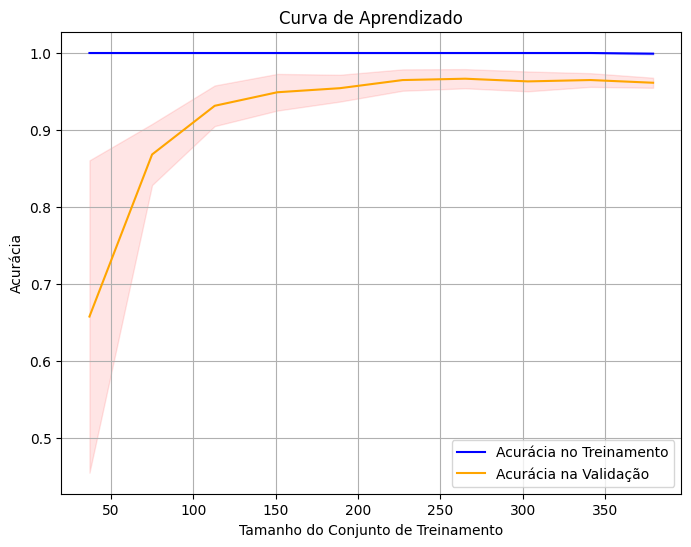

In [368]:
tamanhos_treino, pontuacoes_treino, pontuacoes_validacao = learning_curve(modelo,
                                                                          var_preditoras, var_alvo, cv=3,
                                                                          scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
media_treino = np.mean(pontuacoes_treino, axis=1)
desvio_treino = np.std(pontuacoes_treino, axis=1)
media_validacao = np.mean(pontuacoes_validacao, axis=1)
desvio_validacao = np.std(pontuacoes_validacao, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(tamanhos_treino, media_treino, color="blue", label="Acurácia no Treinamento")
plt.fill_between(tamanhos_treino, media_treino - desvio_treino, media_treino + desvio_treino, color="blue", alpha=0.1)
plt.plot(tamanhos_treino, media_validacao, color="orange", label="Acurácia na Validação")
plt.fill_between(tamanhos_treino, media_validacao - desvio_validacao, media_validacao + desvio_validacao, color="red", alpha=0.1)

plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.title("Curva de Aprendizado")
plt.legend()
plt.grid(True)
plt.show()

## Escolha de Hiperparâmetros

Os `hiperparâmetros` são definições que controlam o aprendizado do modelo. Embora o uso de parâmetros e hiperparâmetros no código de programação - especialmente em funções - seja praticamente a mesma coisa, em machine learning é preciso diferenciar um do outro.

Existem diferentes técnicas para encontrar os melhores hiperparâmetros para um modelo de ML. O método **Grid Search** é uma forma de automatizar a escolha dos melhores hiperparâmetros pré-definidos, onde será feito o treinamento do modelo com *N* combinações de hiperparâmetros e elencado os melhores resultados.



*   Dicionário de hiperparâmetros Random Forest e alguns possíveis valores:




In [369]:
h_parametros = {
    'n_estimators': [100, 200, 300],  # Número de árvores
    'max_depth': [1, 6, 8, 10, 15, 20, None],  # Profundidade máxima
    'min_samples_split': [2, 5, 10],  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2'], # Máximo de atributos considerados
    'criterion': ['gini', 'entropy'],# Critério de divisão das árvores
    'bootstrap': [True, False]  # Uso de amostragem com reposição
}

In [370]:
gs = GridSearchCV(estimator=modelo, param_grid=h_parametros, scoring='roc_auc', cv=5) # Algoritmo GridSearch

A execução do algoritmo e exibição dos resultados é feita com os códigos abaixo, mas isso pode demorar, aproximadamente, 1 hora, e o resultado são os hiperparâmetros que estão no modelo já criado, no índice **Ajuste do Modelo e Predição** em <  **Treinamento do Modelo**.




In [371]:
# gs.fit(x_treino, y_treino) # Ajuste do algoritmo com os dados de treino (execução não recomendada)

In [372]:
# print("Melhores hiperparâmetros:", gs.best_params_) # Exibir hiperparâmetros

# Salvando Modelo

Não existe regra para a exportação ou deploy do modelo, aqui vai uma sugestão com a biblioteca joblib...

In [373]:
import joblib

In [374]:
joblib.dump(modelo, "modelo_random_forest.joblib")

['modelo_random_forest.joblib']